In [70]:
import numpy as np
import pandas as pd

In [71]:
loan_data_input_train = pd.read_csv('loan_data_input_train.csv',index_col = 0)
loan_data_input_test= pd.read_csv('loan_data_input_test.csv',index_col = 0)
loan_data_target_train= pd.read_csv('loan_data_target_train.csv',index_col = 0)
loan_data_target_test= pd.read_csv('loan_data_target_test.csv',index_col = 0)

In [72]:
loan_data_input_train['home_ownership: RENT_OTHER_NONE_ANY']

427211    0
206088    0
136020    0
412305    1
36159     0
         ..
259178    0
365838    1
131932    1
146867    0
121958    0
Name: home_ownership: RENT_OTHER_NONE_ANY, Length: 373028, dtype: int64

In [73]:
loan_data_input_test.shape

(93257, 332)

In [74]:
loan_data_input_train.shape

(373028, 332)

In [75]:
loan_data_target_test.shape

(93257, 1)

In [76]:
loan_data_target_train.shape

(373028, 1)

In [77]:
loan_data_target_test.head()

,good_bad
362514,1
288564,1
213591,1
263083,1
165001,1


In [78]:
# Here we select a limited set of input variables in a new dataframe.
inputs_train_with_ref_cat = loan_data_input_train.reindex(columns = ['grade:A',
'grade:B',
'grade:C',
'grade:D',
'grade:E',
'grade:F',
'grade:G',
'home_ownership: RENT_OTHER_NONE_ANY',
'home_ownership:OWN',
'home_ownership:MORTGAGE',
'addr_state:NE_IA_MS_MT_ND',
'addr_state:TN_RI_NV',
'addr_state:LA_HI_SD_AZ_PA_OK',
'addr_state:NY',
'addr_state:MD_FL',
'addr_state:VA_MA',
'addr_state:AR_DE_WV_MO',
'addr_state:IN_OH_NC_AL_MI',
'addr_state:TX',
'addr_state:CA',
'addr_state:VT_CO_IL',
'addr_state:UT_MN_SC_OR_KY_NM',
'addr_state:WA_CT_NH_KS_DC_WY',
'verification_status:Not Verified',
'verification_status:Source Verified',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'purpose:credit_card',
'purpose:debt_consolidation',
'purpose:oth__med__vacation',
'purpose:major_purch__car__home_impr',
'initial_list_status:f',
'initial_list_status:w',
'term:36',
'term:60',
'emp_length_int:0',
'emp_length_int:1',
'emp_length_int:8',
'emp_length_int:9',
'emp_length_int:10',
'mnths_since_issue_d:<45',
'mnths_since_issue_d:45-50',
'mnths_since_issue_d:51-55',
'mnths_since_issue_d:56-59',
'mnths_since_issue_d:60-84',
'mnths_since_issue_d:85-108',
'mnths_since_issue_d:108-111',
'mnths_since_issue_d:>112',
'int_rate:<9.548',
'int_rate:9.548-12.025',
'int_rate:12.025-15.74',
'int_rate:15.74-20.281',
'int_rate:>20.281',
'earliest_cr_line_date_mnths:70-129',
'earliest_cr_line_date_mnths:129-164',
'earliest_cr_line_date_mnths:164-187',
'earliest_cr_line_date_mnths:187-270',
'earliest_cr_line_date_mnths:270-316',
'earliest_cr_line_date_mnths:316-399',
'earliest_cr_line_date_mnths:399-587',                                                            
'df_delinq_2yrs_[0]',
'df_delinq_2yrs_[1-3]',
'df_delinq_2yrs_[3-29]',
'inq_last_6mths:0',
'inq_last_6mths:1',
'inq_last_6mths:2-4',
'inq_last_6mths:>4',
'open_acc: 0-3',
'open_acc: 4-6',
'open_acc: 7-10',
'open_acc: 11-12',
'open_acc: 13-15',
'open_acc: 16-18',
'open_acc: >19',
'pub_rec: 0',
'pub_rec: 1',
'pub_rec: >=2',
'total_acc: 0-3',
'total_acc: 4-11',
'total_acc: 12-16',
'total_acc: 17-24',                                                            
'total_acc: 25-31',
'total_acc: 32-39',
'total_acc: 40-46',
'total_acc: 47-59',                                                            
'total_acc: 60-102',
'acc_now_delinq: 0',
'acc_now_delinq: >=1',
'total_rev_hi_lim:<=5K',
'total_rev_hi_lim:5K-10K',
'total_rev_hi_lim:10K-20K',
'total_rev_hi_lim:20K-30K',
'total_rev_hi_lim:30K-40K',
'total_rev_hi_lim:40K-55K',
'total_rev_hi_lim:55K-95K',
'total_rev_hi_lim:>95K',
'annual_inc:<20K',
'annual_inc:20K-30K',
'annual_inc:30K-40K',
'annual_inc:40K-50K',
'annual_inc:50K-60K',
'annual_inc:60K-70K',
'annual_inc:70K-80K',
'annual_inc:80K-90K',
'annual_inc:90K-100K',
'annual_inc:100K-120K',
'annual_inc:120K-140K',
'annual_inc:>140K',
'dti:<2.399',
'dti:2.399-4.799',
'dti:4.8-6.398',
'dti:6.399-8.797',
'dti:8.798-4.12.797',
'dti:12.798-16.796',
'dti:16.797-23.193',
'dti:26.393-28.793',
'dti:>28.793',
'mths_since_last_delinq:Missing',
'mths_since_last_delinq:0-3',
'mths_since_last_delinq:4-30',
'mths_since_last_delinq:31-56',
'mths_since_last_delinq:>=57',
'mths_since_last_record:Missing',
'mths_since_last_record:0-2',
'mths_since_last_record:3-20',
'mths_since_last_record:21-31',
'mths_since_last_record:32-80',
'mths_since_last_record:81-86',
'mths_since_last_record:>=86',
])

In [79]:
# Here we store the names of the reference category dummy variables in a list. 
#to avoid dummy trap we collect all the variables which contain worst category. and drop those cariables from the dummy variables list.
# i.e if all the variables in input_ref_ df is 0 then this varaible is 1
ref_categories = ['grade:G',
'home_ownership: RENT_OTHER_NONE_ANY',
'addr_state:NE_IA_MS_MT_ND',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'initial_list_status:f',
'term:60',
'emp_length_int:0',
'mnths_since_issue_d:>112',
'int_rate:>20.281',
'earliest_cr_line_date_mnths:70-129',
'df_delinq_2yrs_[3-29]',
'inq_last_6mths:>4',
'open_acc: 0-3',
'pub_rec: >=2',
'total_acc: 0-3',
'acc_now_delinq: 0',
'total_rev_hi_lim:<=5K',
'annual_inc:<20K',
'dti:>28.793',
'mths_since_last_delinq:0-3',
'mths_since_last_record:0-2']

In [80]:
"""
'addr_state:NE_IA_MS_MT_ND',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'initial_list_status:f',
'term:60',
'emp_length_int:0',
'mnths_since_issue_d:>112',
'int_rate:>20.281',
'earliest_cr_line_date_mnths:70-129',
'df_delinq_2yrs_[3-29]',
'inq_last_6mths:>4',
'open_acc:0-3',
'pub_rec: >=2',
'total_acc: 0-3',
'acc_now_delinq: 0',
'total_rev_hi_lim:<=5K',
'annual_inc:<20K',
'dti:>28.793',
'mths_since_last_delinq:0-3',
'mths_since_last_record:0-2']
"""

"\n'addr_state:NE_IA_MS_MT_ND',\n'verification_status:Verified',\n'purpose:educ__sm_b__wedd__ren_en__mov__house',\n'initial_list_status:f',\n'term:60',\n'emp_length_int:0',\n'mnths_since_issue_d:>112',\n'int_rate:>20.281',\n'earliest_cr_line_date_mnths:70-129',\n'df_delinq_2yrs_[3-29]',\n'inq_last_6mths:>4',\n'open_acc:0-3',\n'pub_rec: >=2',\n'total_acc: 0-3',\n'acc_now_delinq: 0',\n'total_rev_hi_lim:<=5K',\n'annual_inc:<20K',\n'dti:>28.793',\n'mths_since_last_delinq:0-3',\n'mths_since_last_record:0-2']\n"

In [81]:
inputs_train = inputs_train_with_ref_cat.drop(ref_categories,axis = 1)

# From the dataframe with input variables, we drop the variables with variable names in the list with reference categories. 

In [82]:
inputs_train.head()

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:TN_RI_NV,addr_state:LA_HI_SD_AZ_PA_OK,...,mths_since_last_delinq:Missing,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,mths_since_last_record:Missing,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>=86
427211,1,0,0,0,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
206088,0,0,1,0,0,0,0,1,0,0,...,0,1,0,0,1,0,0,0,0,0
136020,1,0,0,0,0,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0
412305,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
36159,0,0,1,0,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0


In [83]:
#Model
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [84]:
reg = LogisticRegression()


In [85]:
np.all(np.isfinite(loan_data_target_train))

True

In [86]:
np.any(np.isnan(loan_data_target_train))

False

In [87]:
#inputs_train.to_csv('inputs_train.csv')

In [88]:
#inputs_train.replace([np.inf, -np.inf], np.nan, inplace = True)

In [89]:
#inputs_train.fillna(-1, inplace=True)

In [90]:
reg.fit(inputs_train,loan_data_target_train)

C:\Users\Balamre\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Balamre\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [91]:
reg.intercept_

array([-0.74753309])

In [92]:
reg.coef_

array([[ 1.31684792,  0.86946772,  0.73105813,  0.53027178,  0.28452525,
         0.16352474,  0.10902907,  0.1454622 , -0.26546784, -0.24030379,
        -0.22464201, -0.18492319, -0.21326394, -0.0788933 , -0.03911782,
        -0.09898596, -0.0510888 ,  0.02793588,  0.01565553,  0.21445485,
         0.10050787, -0.01495759,  0.09240163,  0.08277937,  0.16637731,
         0.13503472,  0.00657784,  0.08091387, -0.01691808, -0.05612353,
        -0.16406546, -0.00868607,  1.44913207,  1.70770123,  2.03442352,
         2.13939117,  3.14328621,  1.55915422,  0.88753061,  0.49648402,
         0.31133382, -0.04059815, -0.08502032,  0.01264148,  0.08667116,
         0.0656176 ,  0.0857478 ,  0.06115808,  0.11393067,  0.08699698,
         0.01811505,  1.39030984,  1.34514169,  1.24093918,  0.07684535,
        -0.08792318, -0.12307997, -0.14379925, -0.25556519, -0.20440974,
        -0.20533964, -0.11319876,  0.28609246,  0.33024876,  0.34322068,
         0.38646948,  0.3851741 ,  0.35745626,  0.3

In [93]:
# removed 'emp_length_int:2-3','emp_length_int:4-5','emp_length_int:6-7', as it had all 0 values in dummy variables 
#and was causing singular matrix error in p value calcualtaion

In [94]:
feature_names = inputs_train.columns.values

In [95]:
summary_table = pd.DataFrame(columns = ['feature_names'], data = feature_names )

In [96]:
summary_table['Coefficients'] = np.transpose(reg.coef_)

In [97]:
summary_table.index = summary_table.index + 1

In [98]:
summary_table.loc[0] = ['Intercept', reg.intercept_[0]]


In [99]:
summary_table

,feature_names,Coefficients
1,grade:A,1.316848
2,grade:B,0.869468
3,grade:C,0.731058
4,grade:D,0.530272
5,grade:E,0.284525
...,...,...
104,mths_since_last_record:21-31,0.167938
105,mths_since_last_record:32-80,0.205978
106,mths_since_last_record:81-86,-0.091470
107,mths_since_last_record:>=86,-0.008960


In [100]:
summary_table = summary_table.sort_index()

In [101]:
summary_table_new = summary_table

In [102]:
# P values for sklearn logistic regression.

# Class to display p-values for logistic regression in sklearn.

from sklearn import linear_model
import scipy.stats as stat

class LogisticRegression_with_p_values:
    
    def __init__(self,*args,**kwargs):#,**kwargs):
        self.model = linear_model.LogisticRegression(*args,**kwargs)#,**args)

    def fit(self,X,y):
        self.model.fit(X,y)
        
        #### Get p-values for the fitted model ####
        denom = (2.0 * (1.0 + np.cosh(self.model.decision_function(X))))
        denom = np.tile(denom,(X.shape[1],1)).T
        F_ij = np.dot((X / denom).T,X) ## Fisher Information Matrix
        Cramer_Rao = np.linalg.inv(F_ij) ## Inverse Information Matrix
        sigma_estimates = np.sqrt(np.diagonal(Cramer_Rao))
        z_scores = self.model.coef_[0] / sigma_estimates # z-score for eaach model coefficient
        p_values = [stat.norm.sf(abs(x)) * 2 for x in z_scores] ### two tailed test for p-values
        
        self.coef_ = self.model.coef_
        self.intercept_ = self.model.intercept_
        self.p_values = p_values

In [103]:
reg_p = LogisticRegression_with_p_values()

In [104]:
#inputs_train.corr()

In [105]:
reg_p.fit(inputs_train,loan_data_target_train)

C:\Users\Balamre\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Balamre\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [106]:
#inputs_train.to_csv('inputs_train.csv')

In [107]:
#inputs_train = pd.read_csv('inputs_train.csv')

In [108]:
summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_names)
summary_table['Coefficients'] = np.transpose(reg.coef_)
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', reg.intercept_[0]]
summary_table = summary_table.sort_index()
summary_table

,Feature name,Coefficients
0,Intercept,-0.747533
1,grade:A,1.316848
2,grade:B,0.869468
3,grade:C,0.731058
4,grade:D,0.530272
...,...,...
103,mths_since_last_record:3-20,0.229459
104,mths_since_last_record:21-31,0.167938
105,mths_since_last_record:32-80,0.205978
106,mths_since_last_record:81-86,-0.091470


In [109]:
# This is a list.
p_values = reg_p.p_values

In [110]:
p_values = np.append(np.nan, np.array(p_values))

In [111]:
summary_table['p_values'] = p_values

In [112]:
summary_table

,Feature name,Coefficients,p_values
0,Intercept,-0.747533,NaN
1,grade:A,1.316848,2.800189e-13
2,grade:B,0.869468,3.070498e-11
3,grade:C,0.731058,5.757287e-10
4,grade:D,0.530272,8.133721e-07
...,...,...,...
103,mths_since_last_record:3-20,0.229459,4.233550e-01
104,mths_since_last_record:21-31,0.167938,5.375810e-01
105,mths_since_last_record:32-80,0.205978,3.717528e-01
106,mths_since_last_record:81-86,-0.091470,6.846299e-01


In [113]:
summary_table_new = summary_table

In [114]:
ref_categories_2 = ['purpose:credit_card',
'purpose:debt_consolidation',
'purpose:oth__med__vacation',
'purpose:major_purch__car__home_impr',
'initial_list_status:w',
'term:36',
'emp_length_int:1',
'emp_length_int:8',
'emp_length_int:9',
'emp_length_int:10',
'earliest_cr_line_date_mnths:129-164',
'earliest_cr_line_date_mnths:164-187',
'earliest_cr_line_date_mnths:187-270',
'earliest_cr_line_date_mnths:270-316',
'earliest_cr_line_date_mnths:316-399',
'earliest_cr_line_date_mnths:399-587',
'df_delinq_2yrs_[0]',
'df_delinq_2yrs_[1-3]',
'open_acc: 4-6',
'open_acc: 7-10',
'open_acc: 11-12',
'open_acc: 13-15',
'open_acc: 16-18',
'open_acc: >19',                    
'pub_rec: 0',
'pub_rec: 1',
'total_acc: 4-11',
'total_acc: 12-16',
'total_acc: 17-24',                                                            
'total_acc: 25-31',
'total_acc: 32-39',
'total_acc: 40-46',
'total_acc: 47-59',                                                            
'total_acc: 60-102',
'acc_now_delinq: >=1',
'total_rev_hi_lim:5K-10K',
'total_rev_hi_lim:10K-20K',
'total_rev_hi_lim:20K-30K',
'total_rev_hi_lim:30K-40K',
'total_rev_hi_lim:40K-55K',
'total_rev_hi_lim:55K-95K',
'total_rev_hi_lim:>95K',
'annual_inc:20K-30K',
'annual_inc:30K-40K',
'annual_inc:40K-50K',
'annual_inc:50K-60K',
'annual_inc:60K-70K',
'annual_inc:70K-80K',
'annual_inc:80K-90K',
'annual_inc:90K-100K',
'annual_inc:100K-120K',
'annual_inc:120K-140K',
'annual_inc:>140K',
'mths_since_last_delinq:Missing',
'mths_since_last_delinq:4-30',
'mths_since_last_delinq:31-56',
'mths_since_last_delinq:>=57',
'mths_since_last_record:Missing',
'mths_since_last_record:3-20',
'mths_since_last_record:21-31',
'mths_since_last_record:32-80',
'mths_since_last_record:81-86',
'mths_since_last_record:>=86'                    
]
                 


In [115]:
"""
'purpose:credit_card',
'purpose:debt_consolidation',
'purpose:oth__med__vacation',
'purpose:major_purch__car__home_impr',
'initial_list_status:w',
'term:36',
'emp_length_int:1',
'emp_length_int:8',
'emp_length_int:9',
'emp_length_int:10',
'earliest_cr_line_date_mnths:129-164',
'earliest_cr_line_date_mnths:164-187',
'earliest_cr_line_date_mnths:187-270',
'earliest_cr_line_date_mnths:270-316',
'earliest_cr_line_date_mnths:316-399',
'earliest_cr_line_date_mnths:399-587', 

'df_delinq_2yrs_[0]',
'df_delinq_2yrs_[1-3]',
'open_acc: 4-6',
'open_acc: 7-10',
'open_acc: 11-12',
'open_acc: 13-15',
'open_acc: 16-18',
'open_acc: >19',
'pub_rec: 0',
'pub_rec: 1',
'total_acc: 4-11',
'total_acc: 12-16',
'total_acc: 17-24',                                                            
'total_acc: 25-31',
'total_acc: 32-39',
'total_acc: 40-46',
'total_acc: 47-59',                                                            
'total_acc: 60-102',
'acc_now_delinq: >=1',

'total_rev_hi_lim:5K-10K',
'total_rev_hi_lim:10K-20K',
'total_rev_hi_lim:20K-30K',
'total_rev_hi_lim:30K-40K',
'total_rev_hi_lim:40K-55K',
'total_rev_hi_lim:55K-95K',
'total_rev_hi_lim:>95K',
'annual_inc:20K-30K',
'annual_inc:30K-40K',
'annual_inc:40K-50K',
'annual_inc:50K-60K',
'annual_inc:60K-70K',
'annual_inc:70K-80K',
'annual_inc:80K-90K',
'annual_inc:90K-100K',
'annual_inc:100K-120K',
'annual_inc:120K-140K',
'annual_inc:>140K',
'mths_since_last_delinq:Missing',
'mths_since_last_delinq:4-30',
'mths_since_last_delinq:31-56',
'mths_since_last_delinq:>=57',
'mths_since_last_record:Missing',
'mths_since_last_record:3-20',
'mths_since_last_record:21-31',
'mths_since_last_record:32-80',
'mths_since_last_record:81-86',
'mths_since_last_record:>=86'
"""

"\n'purpose:credit_card',\n'purpose:debt_consolidation',\n'purpose:oth__med__vacation',\n'purpose:major_purch__car__home_impr',\n'initial_list_status:w',\n'term:36',\n'emp_length_int:1',\n'emp_length_int:8',\n'emp_length_int:9',\n'emp_length_int:10',\n'earliest_cr_line_date_mnths:129-164',\n'earliest_cr_line_date_mnths:164-187',\n'earliest_cr_line_date_mnths:187-270',\n'earliest_cr_line_date_mnths:270-316',\n'earliest_cr_line_date_mnths:316-399',\n'earliest_cr_line_date_mnths:399-587', \n\n'df_delinq_2yrs_[0]',\n'df_delinq_2yrs_[1-3]',\n'open_acc: 4-6',\n'open_acc: 7-10',\n'open_acc: 11-12',\n'open_acc: 13-15',\n'open_acc: 16-18',\n'open_acc: >19',\n'pub_rec: 0',\n'pub_rec: 1',\n'total_acc: 4-11',\n'total_acc: 12-16',\n'total_acc: 17-24',                                                            \n'total_acc: 25-31',\n'total_acc: 32-39',\n'total_acc: 40-46',\n'total_acc: 47-59',                                                            \n'total_acc: 60-102',\n'acc_now_delinq: >=1',\n

In [116]:
inputs_train = inputs_train.drop(ref_categories_2,axis = 1)

In [117]:
inputs_train.head()

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:TN_RI_NV,addr_state:LA_HI_SD_AZ_PA_OK,...,inq_last_6mths:1,inq_last_6mths:2-4,dti:<2.399,dti:2.399-4.799,dti:4.8-6.398,dti:6.399-8.797,dti:8.798-4.12.797,dti:12.798-16.796,dti:16.797-23.193,dti:26.393-28.793
427211,1,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
206088,0,0,1,0,0,0,0,1,0,0,...,0,1,0,0,0,1,0,0,0,0
136020,1,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,1,0,0
412305,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
36159,0,0,1,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0


In [118]:
reg2 = LogisticRegression()

In [119]:
reg2.fit(inputs_train,loan_data_target_train)

C:\Users\Balamre\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LogisticRegression()

In [120]:
#inputs_train.to_csv('inputs_train.csv')

In [121]:
#inputs_train.replace([np.inf, -np.inf], np.nan, inplace = True)

In [122]:
#inputs_train.fillna(999, inplace=True)

In [123]:
reg2 = LogisticRegression_with_p_values()

In [124]:
reg2.fit(inputs_train,loan_data_target_train)

C:\Users\Balamre\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [125]:
feature_names = inputs_train.columns.values

In [126]:
summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_names)
summary_table['Coefficients'] = np.transpose(reg2.coef_)
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', reg.intercept_[0]]
summary_table = summary_table.sort_index()
summary_table

,Feature name,Coefficients
0,Intercept,-0.747533
1,grade:A,1.442631
2,grade:B,0.930460
3,grade:C,0.766538
4,grade:D,0.555872
5,grade:E,0.298944
6,grade:F,0.170450
7,home_ownership:OWN,0.129724
8,home_ownership:MORTGAGE,0.203252
9,addr_state:TN_RI_NV,-0.279224


In [127]:
p_values = reg2.p_values
p_values = np.append(np.nan,np.array(p_values))
summary_table['p_values'] = p_values
summary_table

,Feature name,Coefficients,p_values
0,Intercept,-0.747533,NaN
1,grade:A,1.442631,2.607197e-16
2,grade:B,0.930460,1.743071e-13
3,grade:C,0.766538,8.620080e-12
4,grade:D,0.555872,1.994112e-08
5,grade:E,0.298944,3.530965e-04
6,grade:F,0.170450,4.786907e-02
7,home_ownership:OWN,0.129724,3.955022e-03
8,home_ownership:MORTGAGE,0.203252,3.033174e-14
9,addr_state:TN_RI_NV,-0.279224,6.497841e-05


In [128]:
import statsmodels.api as sm
from scipy import stats

In [129]:
X = inputs_train
y = loan_data_target_train
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.084720
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:               good_bad   No. Observations:               373028
Model:                          Logit   Df Residuals:                   372984
Method:                           MLE   Df Model:                           43
Date:                Thu, 10 Dec 2020   Pseudo R-squ.:                 0.06661
Time:                        15:18:15   Log-Likelihood:                -31603.
converged:                       True   LL-Null:                       -33858.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
grade:A                                 1.3834      0.177

In [130]:
import pickle

In [131]:
pickle.dump(reg2, open('pd_model.sav', 'wb'))
# Here we export our model to a 'SAV' file with file name 'pd_model.sav'.

In [132]:
inputs_test_with_ref_cat = loan_data_input_test.reindex(columns = ['grade:A',
'grade:B',
'grade:C',
'grade:D',
'grade:E',
'grade:F',
'grade:G',
'home_ownership: RENT_OTHER_NONE_ANY',
'home_ownership:OWN',
'home_ownership:MORTGAGE',
'addr_state:NE_IA_MS_MT_ND',
'addr_state:TN_RI_NV',
'addr_state:LA_HI_SD_AZ_PA_OK',
'addr_state:NY',
'addr_state:MD_FL',
'addr_state:VA_MA',
'addr_state:AR_DE_WV_MO',
'addr_state:IN_OH_NC_AL_MI',
'addr_state:TX',
'addr_state:CA',
'addr_state:VT_CO_IL',
'addr_state:UT_MN_SC_OR_KY_NM',
'addr_state:WA_CT_NH_KS_DC_WY',
'verification_status:Not Verified',
'verification_status:Source Verified',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'purpose:credit_card',
'purpose:debt_consolidation',
'purpose:oth__med__vacation',
'purpose:major_purch__car__home_impr',
'initial_list_status:f',
'initial_list_status:w',
'term:36',
'term:60',
'emp_length_int:0',
'emp_length_int:1',
'emp_length_int:8',
'emp_length_int:9',
'emp_length_int:10',
'mnths_since_issue_d:<45',
'mnths_since_issue_d:45-50',
'mnths_since_issue_d:51-55',
'mnths_since_issue_d:56-59',
'mnths_since_issue_d:60-84',
'mnths_since_issue_d:85-108',
'mnths_since_issue_d:108-111',
'mnths_since_issue_d:>112',
'int_rate:<9.548',
'int_rate:9.548-12.025',
'int_rate:12.025-15.74',
'int_rate:15.74-20.281',
'int_rate:>20.281',
'earliest_cr_line_date_mnths:70-129',
'earliest_cr_line_date_mnths:129-164',
'earliest_cr_line_date_mnths:164-187',
'earliest_cr_line_date_mnths:187-270',
'earliest_cr_line_date_mnths:270-316',
'earliest_cr_line_date_mnths:316-399',
'earliest_cr_line_date_mnths:399-587',                                                            
'df_delinq_2yrs_[0]',
'df_delinq_2yrs_[1-3]',
'df_delinq_2yrs_[3-29]',
'inq_last_6mths:0',
'inq_last_6mths:1',
'inq_last_6mths:2-4',
'inq_last_6mths:>4',
'open_acc: 0-3',
'open_acc: 4-6',
'open_acc: 7-10',
'open_acc: 11-12',
'open_acc: 13-15',
'open_acc: 16-18',
'open_acc: >19',
'pub_rec: 0',
'pub_rec: 1',
'pub_rec: >=2',
'total_acc: 0-3',
'total_acc: 4-11',
'total_acc: 12-16',
'total_acc: 17-24',                                                            
'total_acc: 25-31',
'total_acc: 32-39',
'total_acc: 40-46',
'total_acc: 47-59',                                                            
'total_acc: 60-102',
'acc_now_delinq: 0',
'acc_now_delinq: >=1',
'total_rev_hi_lim:<=5K',
'total_rev_hi_lim:5K-10K',
'total_rev_hi_lim:10K-20K',
'total_rev_hi_lim:20K-30K',
'total_rev_hi_lim:30K-40K',
'total_rev_hi_lim:40K-55K',
'total_rev_hi_lim:55K-95K',
'total_rev_hi_lim:>95K',
'annual_inc:<20K',
'annual_inc:20K-30K',
'annual_inc:30K-40K',
'annual_inc:40K-50K',
'annual_inc:50K-60K',
'annual_inc:60K-70K',
'annual_inc:70K-80K',
'annual_inc:80K-90K',
'annual_inc:90K-100K',
'annual_inc:100K-120K',
'annual_inc:120K-140K',
'annual_inc:>140K',
'dti:<2.399',
'dti:2.399-4.799',
'dti:4.8-6.398',
'dti:6.399-8.797',
'dti:8.798-4.12.797',
'dti:12.798-16.796',
'dti:16.797-23.193',
'dti:26.393-28.793',
'dti:>28.793',
'mths_since_last_delinq:Missing',
'mths_since_last_delinq:0-3',
'mths_since_last_delinq:4-30',
'mths_since_last_delinq:31-56',
'mths_since_last_delinq:>=57',
'mths_since_last_record:Missing',
'mths_since_last_record:0-2',
'mths_since_last_record:3-20',
'mths_since_last_record:21-31',
'mths_since_last_record:32-80',
'mths_since_last_record:81-86',
'mths_since_last_record:>=86'
])                                                                  


In [133]:
inputs_test = inputs_test_with_ref_cat.drop(ref_categories,axis = 1)


In [134]:
inputs_test = inputs_test.drop(ref_categories_2,axis = 1)

In [135]:
inputs_test.columns.values

array(['grade:A', 'grade:B', 'grade:C', 'grade:D', 'grade:E', 'grade:F',
       'home_ownership:OWN', 'home_ownership:MORTGAGE',
       'addr_state:TN_RI_NV', 'addr_state:LA_HI_SD_AZ_PA_OK',
       'addr_state:NY', 'addr_state:MD_FL', 'addr_state:VA_MA',
       'addr_state:AR_DE_WV_MO', 'addr_state:IN_OH_NC_AL_MI',
       'addr_state:TX', 'addr_state:CA', 'addr_state:VT_CO_IL',
       'addr_state:UT_MN_SC_OR_KY_NM', 'addr_state:WA_CT_NH_KS_DC_WY',
       'verification_status:Not Verified',
       'verification_status:Source Verified', 'mnths_since_issue_d:<45',
       'mnths_since_issue_d:45-50', 'mnths_since_issue_d:51-55',
       'mnths_since_issue_d:56-59', 'mnths_since_issue_d:60-84',
       'mnths_since_issue_d:85-108', 'mnths_since_issue_d:108-111',
       'int_rate:<9.548', 'int_rate:9.548-12.025',
       'int_rate:12.025-15.74', 'int_rate:15.74-20.281',
       'inq_last_6mths:0', 'inq_last_6mths:1', 'inq_last_6mths:2-4',
       'dti:<2.399', 'dti:2.399-4.799', 'dti:4.8-6.398',


In [136]:
inputs_test.head()

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:TN_RI_NV,addr_state:LA_HI_SD_AZ_PA_OK,...,inq_last_6mths:1,inq_last_6mths:2-4,dti:<2.399,dti:2.399-4.799,dti:4.8-6.398,dti:6.399-8.797,dti:8.798-4.12.797,dti:12.798-16.796,dti:16.797-23.193,dti:26.393-28.793
362514,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
288564,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
213591,0,0,1,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,1,0,0
263083,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
165001,1,0,0,0,0,0,0,1,0,1,...,0,0,0,0,0,1,0,0,0,0


In [137]:
y_hat_test = reg2.model.predict(inputs_test)

In [138]:
y_hat_test

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [139]:
y_hat_test_proba = reg2.model.predict_proba(inputs_test)

In [140]:
y_hat_test_proba

array([[0.01829786, 0.98170214],
       [0.03590899, 0.96409101],
       [0.00453958, 0.99546042],
       ...,
       [0.00539557, 0.99460443],
       [0.00369123, 0.99630877],
       [0.00386244, 0.99613756]])

In [141]:
y_hat_test_proba = y_hat_test_proba[ : ][: , 1]

In [142]:
loan_data_target_temp = loan_data_target_test

In [143]:
loan_data_target_temp

,good_bad
362514,1
288564,1
213591,1
263083,1
165001,1
...,...
115,1
296284,1
61777,1
91763,1


In [144]:
loan_data_target_temp.reset_index(drop = True, inplace = True)

In [145]:
loan_data_target_temp

,good_bad
0,1
1,1
2,1
3,1
4,1
...,...
93252,1
93253,1
93254,1
93255,1


In [146]:
df_actual_predicted_probs = pd.concat([loan_data_target_temp, pd.DataFrame(y_hat_test_proba)],axis =1)

In [147]:
df_actual_predicted_probs

,good_bad,0
0,1,0.981702
1,1,0.964091
2,1,0.995460
3,1,0.976352
4,1,0.996797
...,...,...
93252,1,0.997333
93253,1,0.984785
93254,1,0.994604
93255,1,0.996309


In [148]:
df_actual_predicted_probs.columns = ['loan_data_target_temp','y_hat_test_proba']

In [149]:
df_actual_predicted_probs

,loan_data_target_temp,y_hat_test_proba
0,1,0.981702
1,1,0.964091
2,1,0.995460
3,1,0.976352
4,1,0.996797
...,...,...
93252,1,0.997333
93253,1,0.984785
93254,1,0.994604
93255,1,0.996309


In [150]:
df_actual_predicted_probs.index = loan_data_input_test.index

In [151]:
tr = 0.9
# We create a new column with an indicator,
# where every observation that has predicted probability greater than the threshold has a value of 1,
# and every observation that has predicted probability lower than the threshold has a value of 0.
df_actual_predicted_probs['y_hat_test'] = np.where(df_actual_predicted_probs['y_hat_test_proba'] > tr, 1, 0)

In [152]:
pd.crosstab(df_actual_predicted_probs['loan_data_target_temp'],df_actual_predicted_probs['y_hat_test'],
            rownames = ['Actual'], colnames = ['Predicted'])

Predicted,0,1
Actual,,
0,81,1640
1,405,91131


In [153]:
# with 0.5 about 90% borrowers r grouped as good borrowers - but its not fair as even bad borrowers are set as good.
#increasing tr to 0.9 we find there r true negatives as well but gud borrowers are set as bad. being stringent

In [154]:
pd.crosstab(df_actual_predicted_probs['loan_data_target_temp'],df_actual_predicted_probs['y_hat_test'],rownames = ['Actual'], colnames = ['Predicted'])/df_actual_predicted_probs.shape[0]

Predicted,0,1
Actual,,
0,0.000869,0.017586
1,0.004343,0.977203


In [155]:
(pd.crosstab(df_actual_predicted_probs['loan_data_target_temp'], df_actual_predicted_probs['y_hat_test'], rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]).iloc[0, 0] + (pd.crosstab(df_actual_predicted_probs['loan_data_target_temp'], df_actual_predicted_probs['y_hat_test'], rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]).iloc[1, 1]

0.9780713512122414

In [156]:
from sklearn.metrics import roc_curve, roc_auc_score

In [157]:
roc_curve(df_actual_predicted_probs['loan_data_target_temp'],df_actual_predicted_probs['y_hat_test_proba'])

(array([0.        , 0.        , 0.        , ..., 0.99941894, 1.        ,
        1.        ]),
 array([0.00000000e+00, 1.09246635e-05, 5.46233176e-05, ...,
        9.99978151e-01, 9.99989075e-01, 1.00000000e+00]),
 array([1.99938213, 0.99938213, 0.99929414, ..., 0.4459304 , 0.43502558,
        0.36561124]))

In [158]:
fpr,tpr,thresholds = roc_curve(df_actual_predicted_probs['loan_data_target_temp'],df_actual_predicted_probs['y_hat_test_proba'])

In [159]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

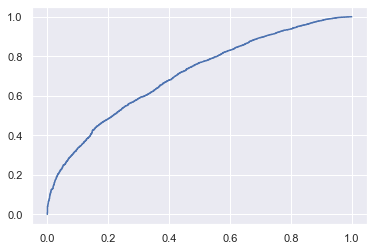

In [160]:
plt.plot(fpr,tpr)

Text(0.5, 1.0, 'ROC curve')

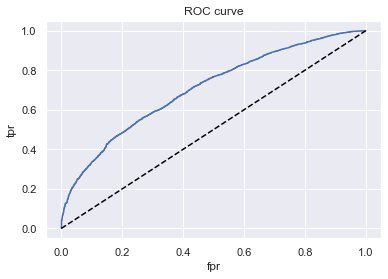

In [161]:
plt.plot(fpr,tpr)
plt.plot(fpr,fpr,linestyle = '--', color = 'black')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve')

In [162]:
AUroc = roc_auc_score(df_actual_predicted_probs['loan_data_target_temp'],df_actual_predicted_probs['y_hat_test_proba'])
AUroc

0.7062325763995173

In [163]:
df_actual_predicted_probs = df_actual_predicted_probs.sort_values('y_hat_test_proba')

In [164]:
df_actual_predicted_probs.head()

,loan_data_target_temp,y_hat_test_proba,y_hat_test
41742,1,0.365611,0
41663,1,0.435026,0
41676,0,0.435026,0
42341,1,0.445930,0
42344,1,0.452470,0


In [165]:
df_actual_predicted_probs.tail()

,loan_data_target_temp,y_hat_test_proba,y_hat_test
10908,1,0.999294,1
201758,1,0.999315,1
11844,1,0.999328,1
8851,1,0.999329,1
202181,1,0.999382,1


In [166]:
df_actual_predicted_probs = df_actual_predicted_probs.reset_index()

In [167]:
df_actual_predicted_probs['cumulative_population'] = df_actual_predicted_probs.index + 1
df_actual_predicted_probs['cumulative_gud_population']=df_actual_predicted_probs['loan_data_target_temp'].cumsum()
df_actual_predicted_probs['cumulative_bad_population']=df_actual_predicted_probs['cumulative_population'] - df_actual_predicted_probs['loan_data_target_temp'].cumsum()

In [168]:
df_actual_predicted_probs['cumulative_perc_population'] = df_actual_predicted_probs['cumulative_population']/(df_actual_predicted_probs.shape[0])
df_actual_predicted_probs['cumulative_ positive_perc'] = df_actual_predicted_probs['cumulative_gud_population']/df_actual_predicted_probs['loan_data_target_temp'].sum()
df_actual_predicted_probs['cumulative_ negative_perc'] = df_actual_predicted_probs['cumulative_bad_population']/(df_actual_predicted_probs.shape[0] - df_actual_predicted_probs['loan_data_target_temp'].sum())

In [169]:
df_actual_predicted_probs

,index,loan_data_target_temp,y_hat_test_proba,y_hat_test,cumulative_population,cumulative_gud_population,cumulative_bad_population,cumulative_perc_population,cumulative_ positive_perc,cumulative_ negative_perc
0,41742,1,0.365611,0,1,1,0,0.000011,0.000011,0.000000
1,41663,1,0.435026,0,2,2,0,0.000021,0.000022,0.000000
2,41676,0,0.435026,0,3,2,1,0.000032,0.000022,0.000581
3,42341,1,0.445930,0,4,3,1,0.000043,0.000033,0.000581
4,42344,1,0.452470,0,5,4,1,0.000054,0.000044,0.000581
...,...,...,...,...,...,...,...,...,...,...
93252,10908,1,0.999294,1,93253,91532,1721,0.999957,0.999956,1.000000
93253,201758,1,0.999315,1,93254,91533,1721,0.999968,0.999967,1.000000
93254,11844,1,0.999328,1,93255,91534,1721,0.999979,0.999978,1.000000
93255,8851,1,0.999329,1,93256,91535,1721,0.999989,0.999989,1.000000


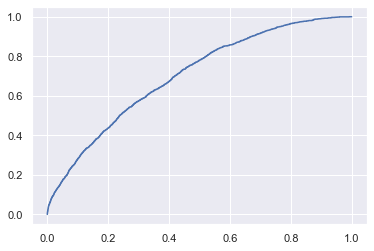

In [170]:
# Gini calcualtion
plt.plot(df_actual_predicted_probs['cumulative_perc_population'],df_actual_predicted_probs['cumulative_ negative_perc'])
#plt.xlim([0,1])

Text(0.5, 1.0, 'Gini')

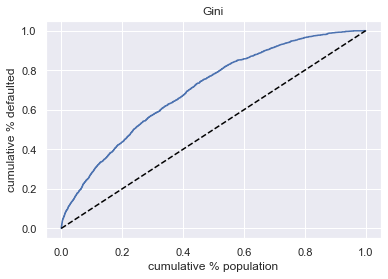

In [171]:
plt.plot(df_actual_predicted_probs['cumulative_perc_population'],df_actual_predicted_probs['cumulative_ negative_perc'])
plt.plot(df_actual_predicted_probs['cumulative_perc_population'],df_actual_predicted_probs['cumulative_perc_population'],linestyle = '--', color = 'black')
plt.xlabel('cumulative % population')
plt.ylabel('cumulative % defaulted')
plt.title('Gini')

In [172]:
Gini = AUroc * 2 - 1
Gini

0.4124651527990346

Text(0, 0.5, 'cumulative % ')

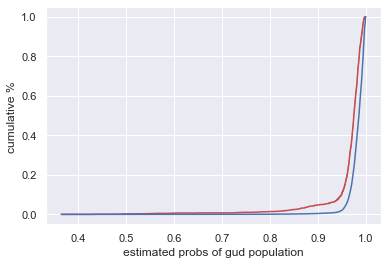

In [173]:
# K-S
plt.plot(df_actual_predicted_probs['y_hat_test_proba'],df_actual_predicted_probs['cumulative_ negative_perc'], color = 'r')
plt.plot(df_actual_predicted_probs['y_hat_test_proba'],df_actual_predicted_probs['cumulative_ positive_perc'], color = 'b')
plt.xlabel('estimated probs of gud population')
plt.ylabel('cumulative % ')

In [174]:
KS = max(df_actual_predicted_probs['cumulative_ negative_perc'] - df_actual_predicted_probs['cumulative_ positive_perc'])
KS

0.29245574984402045

In [175]:
ref_categories

['grade:G',
 'home_ownership: RENT_OTHER_NONE_ANY',
 'addr_state:NE_IA_MS_MT_ND',
 'verification_status:Verified',
 'purpose:educ__sm_b__wedd__ren_en__mov__house',
 'initial_list_status:f',
 'term:60',
 'emp_length_int:0',
 'mnths_since_issue_d:>112',
 'int_rate:>20.281',
 'earliest_cr_line_date_mnths:70-129',
 'df_delinq_2yrs_[3-29]',
 'inq_last_6mths:>4',
 'open_acc: 0-3',
 'pub_rec: >=2',
 'total_acc: 0-3',
 'acc_now_delinq: 0',
 'total_rev_hi_lim:<=5K',
 'annual_inc:<20K',
 'dti:>28.793',
 'mths_since_last_delinq:0-3',
 'mths_since_last_record:0-2']

In [176]:
df_ref_categories = pd.DataFrame(ref_categories ,columns = ['Feature name'])

In [177]:
df_ref_categories['Coefficients'] = 0
df_ref_categories['p_values'] = 'Nan'


In [178]:
df_ref_categories


,Feature name,Coefficients,p_values
0,grade:G,0,Nan
1,home_ownership: RENT_OTHER_NONE_ANY,0,Nan
2,addr_state:NE_IA_MS_MT_ND,0,Nan
3,verification_status:Verified,0,Nan
4,purpose:educ__sm_b__wedd__ren_en__mov__house,0,Nan
5,initial_list_status:f,0,Nan
6,term:60,0,Nan
7,emp_length_int:0,0,Nan
8,mnths_since_issue_d:>112,0,Nan
9,int_rate:>20.281,0,Nan


In [179]:
summary_table

,Feature name,Coefficients,p_values
0,Intercept,-0.747533,NaN
1,grade:A,1.442631,2.607197e-16
2,grade:B,0.930460,1.743071e-13
3,grade:C,0.766538,8.620080e-12
4,grade:D,0.555872,1.994112e-08
5,grade:E,0.298944,3.530965e-04
6,grade:F,0.170450,4.786907e-02
7,home_ownership:OWN,0.129724,3.955022e-03
8,home_ownership:MORTGAGE,0.203252,3.033174e-14
9,addr_state:TN_RI_NV,-0.279224,6.497841e-05


In [180]:
df_score = pd.concat([summary_table,df_ref_categories])
#df_score['Feature name'] = summary_table['Feature name']

In [181]:
df_score

,Feature name,Coefficients,p_values
0,Intercept,-0.747533,NaN
1,grade:A,1.442631,2.6072e-16
2,grade:B,0.930460,1.74307e-13
3,grade:C,0.766538,8.62008e-12
4,grade:D,0.555872,1.99411e-08
...,...,...,...
17,total_rev_hi_lim:<=5K,0.000000,Nan
18,annual_inc:<20K,0.000000,Nan
19,dti:>28.793,0.000000,Nan
20,mths_since_last_delinq:0-3,0.000000,Nan


In [182]:
df_score = df_score.reset_index()

In [183]:
min_score = 300
max_score = 850

In [184]:
df_score

,index,Feature name,Coefficients,p_values
0,0,Intercept,-0.747533,NaN
1,1,grade:A,1.442631,2.6072e-16
2,2,grade:B,0.930460,1.74307e-13
3,3,grade:C,0.766538,8.62008e-12
4,4,grade:D,0.555872,1.99411e-08
...,...,...,...,...
62,17,total_rev_hi_lim:<=5K,0.000000,Nan
63,18,annual_inc:<20K,0.000000,Nan
64,19,dti:>28.793,0.000000,Nan
65,20,mths_since_last_delinq:0-3,0.000000,Nan


In [185]:
df_score['Original feature name'] = df_score['Feature name'].str.split(':').str[0]

In [186]:
df_score

,index,Feature name,Coefficients,p_values,Original feature name
0,0,Intercept,-0.747533,NaN,Intercept
1,1,grade:A,1.442631,2.6072e-16,grade
2,2,grade:B,0.930460,1.74307e-13,grade
3,3,grade:C,0.766538,8.62008e-12,grade
4,4,grade:D,0.555872,1.99411e-08,grade
...,...,...,...,...,...
62,17,total_rev_hi_lim:<=5K,0.000000,Nan,total_rev_hi_lim
63,18,annual_inc:<20K,0.000000,Nan,annual_inc
64,19,dti:>28.793,0.000000,Nan,dti
65,20,mths_since_last_delinq:0-3,0.000000,Nan,mths_since_last_delinq


In [187]:
df_score.groupby('Original feature name')['Coefficients'].min()

Original feature name
Intercept                     -0.747533
acc_now_delinq                 0.000000
addr_state                    -0.279224
annual_inc                     0.000000
df_delinq_2yrs_[3-29]          0.000000
dti                           -0.034625
earliest_cr_line_date_mnths    0.000000
emp_length_int                 0.000000
grade                          0.000000
home_ownership                 0.000000
initial_list_status            0.000000
inq_last_6mths                 0.000000
int_rate                      -0.073834
mnths_since_issue_d            0.000000
mths_since_last_delinq         0.000000
mths_since_last_record         0.000000
open_acc                       0.000000
pub_rec                        0.000000
purpose                        0.000000
term                           0.000000
total_acc                      0.000000
total_rev_hi_lim               0.000000
verification_status           -0.041066
Name: Coefficients, dtype: float64

In [188]:
min_sum_coef = df_score.groupby('Original feature name')['Coefficients'].min().sum()
min_sum_coef

-1.176281932180945

In [189]:
df_score.groupby('Original feature name')['Coefficients'].max()

Original feature name
Intercept                     -0.747533
acc_now_delinq                 0.000000
addr_state                     0.203327
annual_inc                     0.000000
df_delinq_2yrs_[3-29]          0.000000
dti                            0.450173
earliest_cr_line_date_mnths    0.000000
emp_length_int                 0.000000
grade                          1.442631
home_ownership                 0.203252
initial_list_status            0.000000
inq_last_6mths                 1.363883
int_rate                       0.541351
mnths_since_issue_d            3.336913
mths_since_last_delinq         0.000000
mths_since_last_record         0.000000
open_acc                       0.000000
pub_rec                        0.000000
purpose                        0.000000
term                           0.000000
total_acc                      0.000000
total_rev_hi_lim               0.000000
verification_status            0.043298
Name: Coefficients, dtype: float64

In [190]:
max_sum_coef = df_score.groupby('Original feature name')['Coefficients'].max().sum()
max_sum_coef

6.8372948230969435

In [191]:
df_score['Score - Calculation'] = df_score['Coefficients'] * (max_score - min_score) / (max_sum_coef - min_sum_coef)

In [192]:
df_score.tail(60)

,index,Feature name,Coefficients,p_values,Original feature name,Score - Calculation
7,7,home_ownership:OWN,0.129724,0.00395502,home_ownership,8.903402
8,8,home_ownership:MORTGAGE,0.203252,3.03317e-14,home_ownership,13.949883
9,9,addr_state:TN_RI_NV,-0.279224,6.49784e-05,addr_state,-19.164144
10,10,addr_state:LA_HI_SD_AZ_PA_OK,-0.246418,1.08441e-06,addr_state,-16.912527
11,11,addr_state:NY,-0.219489,2.03537e-05,addr_state,-15.064316
12,12,addr_state:MD_FL,-0.193628,0.000136441,addr_state,-13.289392
13,13,addr_state:VA_MA,-0.202575,0.000874245,addr_state,-13.903405
14,14,addr_state:AR_DE_WV_MO,-0.101299,0.183162,addr_state,-6.952500
15,15,addr_state:IN_OH_NC_AL_MI,-0.055312,0.263933,addr_state,-3.796228
16,16,addr_state:TX,-0.097053,0.0791085,addr_state,-6.661073


In [193]:
df_score['Score - Calculation'][0] = ((df_score['Coefficients'][0] - min_sum_coef) / (max_sum_coef - min_sum_coef)) * (max_score - min_score) + min_score
df_score.head(60)

<ipython-input-193-c5ae6449e738>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_score['Score - Calculation'][0] = ((df_score['Coefficients'][0] - min_sum_coef) / (max_sum_coef - min_sum_coef)) * (max_score - min_score) + min_score


,index,Feature name,Coefficients,p_values,Original feature name,Score - Calculation
0,0,Intercept,-0.747533,NaN,Intercept,329.426543
1,1,grade:A,1.442631,2.6072e-16,grade,99.012853
2,2,grade:B,0.930460,1.74307e-13,grade,63.860762
3,3,grade:C,0.766538,8.62008e-12,grade,52.610212
4,4,grade:D,0.555872,1.99411e-08,grade,38.151422
5,5,grade:E,0.298944,0.000353097,grade,20.517612
6,6,grade:F,0.170450,0.0478691,grade,11.698600
7,7,home_ownership:OWN,0.129724,0.00395502,home_ownership,8.903402
8,8,home_ownership:MORTGAGE,0.203252,3.03317e-14,home_ownership,13.949883
9,9,addr_state:TN_RI_NV,-0.279224,6.49784e-05,addr_state,-19.164144


In [194]:
df_score['Score - Preliminary'] = df_score['Score - Calculation'].round()

In [195]:
min_sum_score_prel = df_score.groupby('Original feature name')['Score - Preliminary'].min().sum()
min_sum_score_prel

300.0

In [196]:
max_sum_score_prel = df_score.groupby('Original feature name')['Score - Preliminary'].max().sum()
max_sum_score_prel

850.0

In [197]:
df_score['Difference'] = df_score['Score - Preliminary'] - df_score['Score - Calculation']


In [198]:
df_score['Score - Final'] = df_score['Score - Preliminary']

In [199]:
df_score

,index,Feature name,Coefficients,p_values,Original feature name,Score - Calculation,Score - Preliminary,Difference,Score - Final
0,0,Intercept,-0.747533,NaN,Intercept,329.426543,329.0,-0.426543,329.0
1,1,grade:A,1.442631,2.6072e-16,grade,99.012853,99.0,-0.012853,99.0
2,2,grade:B,0.930460,1.74307e-13,grade,63.860762,64.0,0.139238,64.0
3,3,grade:C,0.766538,8.62008e-12,grade,52.610212,53.0,0.389788,53.0
4,4,grade:D,0.555872,1.99411e-08,grade,38.151422,38.0,-0.151422,38.0
...,...,...,...,...,...,...,...,...,...
62,17,total_rev_hi_lim:<=5K,0.000000,Nan,total_rev_hi_lim,0.000000,0.0,0.000000,0.0
63,18,annual_inc:<20K,0.000000,Nan,annual_inc,0.000000,0.0,0.000000,0.0
64,19,dti:>28.793,0.000000,Nan,dti,0.000000,0.0,0.000000,0.0
65,20,mths_since_last_delinq:0-3,0.000000,Nan,mths_since_last_delinq,0.000000,0.0,0.000000,0.0


In [200]:
inputs_test_with_ref_categories = inputs_test_with_ref_cat

In [201]:
inputs_test_with_ref_categories

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,home_ownership: RENT_OTHER_NONE_ANY,home_ownership:OWN,home_ownership:MORTGAGE,...,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,mths_since_last_record:Missing,mths_since_last_record:0-2,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>=86
362514,0,0,1,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
288564,0,0,0,0,1,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
213591,0,0,1,0,0,0,0,0,0,1,...,0,1,0,1,0,0,0,0,0,0
263083,0,0,1,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
165001,1,0,0,0,0,0,0,0,0,1,...,0,1,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,0,1,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
296284,0,1,0,0,0,0,0,1,0,0,...,0,0,1,1,0,0,0,0,0,0
61777,1,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
91763,1,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0


In [202]:
inputs_test_with_ref_categories.insert(0,'Intercept',1)

In [203]:
inputs_test_with_ref_categories=inputs_test_with_ref_categories[df_score['Feature name'].values]

In [204]:
inputs_test_with_ref_categories.head()

,Intercept,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:TN_RI_NV,...,inq_last_6mths:>4,open_acc: 0-3,pub_rec: >=2,total_acc: 0-3,acc_now_delinq: 0,total_rev_hi_lim:<=5K,annual_inc:<20K,dti:>28.793,mths_since_last_delinq:0-3,mths_since_last_record:0-2
362514,1,0,0,1,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
288564,1,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
213591,1,0,0,1,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
263083,1,0,0,1,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
165001,1,1,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0


In [205]:
scores = df_score['Score - Final']

In [206]:
scores.shape

(67,)

In [207]:
inputs_test_with_ref_categories.shape

(93257, 67)

In [208]:
#inputs_test_with_ref_categories = inputs_test_with_ref_categories.iloc[:,~inputs_test_with_ref_categories.columns.duplicated()]

In [209]:
#inputs_test_with_ref_categories.columns.values

In [210]:
#df_score.drop_duplicates(keep = 'first',inplace = True)

In [211]:
#df_score['Feature name'].values

In [212]:
scores = scores.values.reshape(67,1)

In [213]:
scores.shape

(67, 1)

In [214]:
#credit score calculation
credit_Score = inputs_test_with_ref_categories.dot(scores)

In [215]:
credit_Score

,0
362514,617.0
288564,569.0
213591,713.0
263083,598.0
165001,737.0
...,...
115,750.0
296284,629.0
61777,701.0
91763,727.0


In [216]:
sum_coef_from_score = ((credit_Score - min_score) / (max_score - min_score)) * (max_sum_coef - min_sum_coef) + min_sum_coef

In [217]:
y_hat_proba_from_Score = np.exp(sum_coef_from_score)/(np.exp(sum_coef_from_score)+1)

In [218]:
y_hat_proba_from_Score

,0
362514,0.969005
288564,0.939522
213591,0.992164
263083,0.959520
165001,0.994464
...,...
115,0.995415
296284,0.973847
61777,0.990681
91763,0.993601


In [219]:
y_hat_test_proba[0:5]

array([0.98170214, 0.96409101, 0.99546042, 0.97635232, 0.996797  ])

In [220]:
roc_curve(df_actual_predicted_probs['loan_data_target_temp'],df_actual_predicted_probs['y_hat_test_proba'])

(array([0.        , 0.        , 0.        , ..., 0.99941894, 1.        ,
        1.        ]),
 array([0.00000000e+00, 1.09246635e-05, 5.46233176e-05, ...,
        9.99978151e-01, 9.99989075e-01, 1.00000000e+00]),
 array([1.99938213, 0.99938213, 0.99929414, ..., 0.4459304 , 0.43502558,
        0.36561124]))

In [221]:
fpr,tpr,thresholds = roc_curve(df_actual_predicted_probs['loan_data_target_temp'],df_actual_predicted_probs['y_hat_test_proba'])

In [222]:
df_cutoff = pd.concat([pd.DataFrame(thresholds),pd.DataFrame(fpr),pd.DataFrame(tpr)], axis =1)

In [223]:
df_cutoff.columns = ['thresholds','fpr','tpr']

In [224]:
df_cutoff.head()

,thresholds,fpr,tpr
0,1.999382,0.0,0.000000
1,0.999382,0.0,0.000011
2,0.999294,0.0,0.000055
3,0.999264,0.0,0.000076
4,0.999257,0.0,0.000098


In [225]:
df_cutoff['thresholds'][0] = 1-1/np.power(10,16) 

In [226]:
df_cutoff['Score'] = ((np.log(df_cutoff['thresholds'] / (1 - df_cutoff['thresholds'])) - min_sum_coef) * ((max_score - min_score) / (max_sum_coef - min_sum_coef)) + min_score).round()


In [227]:
df_cutoff.head()

,thresholds,fpr,tpr,Score
0,1.000000,0.0,0.000000,1846.0
1,0.999382,0.0,0.000011,888.0
2,0.999294,0.0,0.000055,879.0
3,0.999264,0.0,0.000076,876.0
4,0.999257,0.0,0.000098,875.0


In [228]:
df_cutoff['Score'][0] = max_score

In [229]:
def approved(p):
    return np.where(df_actual_predicted_probs['y_hat_test_proba'] >= p,1,0).sum()

In [230]:
df_cutoff['N_Approved'] = df_cutoff['thresholds'].apply(approved)
df_cutoff['N_Rejected'] = df_actual_predicted_probs['y_hat_test_proba'].shape[0] - df_cutoff['N_Approved']
df_cutoff['Approval_rate'] = df_cutoff['N_Approved']/df_actual_predicted_probs['y_hat_test_proba'].shape[0]
df_cutoff['Rejection_rate'] = 1- df_cutoff['Approval_rate']


In [231]:
df_cutoff.to_csv('df cutoffs')

In [232]:
df_cutoff.iloc[1000:5000]

,thresholds,fpr,tpr,Score,N_Approved,N_Rejected,Approval_rate,Rejection_rate
1000,0.998085,0.000581,0.038040,810.0,3483,89774,0.037348,0.962652
1001,0.998084,0.000581,0.038051,810.0,3484,89773,0.037359,0.962641
1002,0.998081,0.000581,0.038105,810.0,3489,89768,0.037413,0.962587
1003,0.998080,0.000581,0.038138,810.0,3492,89765,0.037445,0.962555
1004,0.998079,0.000581,0.038149,810.0,3493,89764,0.037456,0.962544
...,...,...,...,...,...,...,...,...
4995,0.994360,0.029634,0.185785,736.0,17057,76200,0.182903,0.817097
4996,0.994359,0.029634,0.185807,736.0,17059,76198,0.182925,0.817075
4997,0.994359,0.029634,0.185850,736.0,17063,76194,0.182967,0.817033
4998,0.994358,0.029634,0.185883,736.0,17066,76191,0.183000,0.817000


In [233]:
# 0.940094319	0.926205694	0.989173658	570	92139	1118	0.988011624	0.011988376
#26018	0.950005023	0.893085415	0.978838927	583	91136	2121	0.977256399	0.022743601
#13333	0.985334432	0.215572342	0.500229418	670	46160	47097	0.494976248	0.505023752
#3858	0.995180283	0.019174898	0.14221727	747	13051	80206	0.139946599	0.860053401
